# Solution 04 - Train your first model

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

## Read and display data
We assume that the data is located in a subdirectory called "data". To read in the data we use the `read_csv()` method of Pandas.

In [3]:
df = pd.read_csv("../Data/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Select features and labels
We select from the dataframe, column by column, what should be interpreted as features and what should be interpreted as labels.

In [4]:
features = ["TV", "Radio"] # List of Features
X = df[features]
y = df.Sales

## Training-Test Split
Next, we split the data into training and test data. scikit-learn provides the function `train_test_split` in the `sklearn.model` submodule for this purpose. By default, it randomly selects 25% of the data as test data. Setting the `random_state` parameter to a fixed number guarantees that the random generator will select the same 25% of the data each time the function is called (often makes it easier to avoid errors during model development).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model training
We build a linear regression model. Like all models in scikit-learn, it has a `.fit` method that we use to train the model on the training data.

In [6]:
m = linear_model.LinearRegression()
m.fit(X_train, y_train)

LinearRegression()

## Evaluation of the solution
We determine the $R^2$ value and the (root) mean squared error (RMSE) on the training and test data. To do this, we first determine the model prediction `y_pred`. Model predictions in scikit-learn are made using the `.predict` method, which each model has. The parameters $w$ can be accessed using `m.coef_` or `m.intercept`.

In [10]:
# Metrics on the training data
y_pred = m.predict(X_train)
print(f"R^2 Training data: {metrics.r2_score(y_train, y_pred)}.")
print(f"RMSE Training data: {metrics.mean_squared_error(y_train, y_pred)}.")

# Metrics on the test data
y_pred = m.predict(X_test)
print(f"R^2 Test data: {metrics.r2_score(y_test, y_pred)}.")
print(f"RMSE Test data: {metrics.mean_squared_error(y_test, y_pred)}.")

# Learned coefficients of the model function:
print(f"w0 = {m.intercept_}")
print(f"w = {m.coef_}")

R^2 Training data: 0.8955275873177727.
RMSE Training data: 2.8420054812102697.
R^2 Test data: 0.9133183876478477.
RMSE Test data: 2.356396290987085.
w0 = 4.8193142960357385
w = [0.05461317 0.10204696]


## Task
1. look at the sample code again.

2. delete the code and run a linear regression for the Advertising dataset using all three features `TV`, `Radio` and `Newspaper`. To do this, perform the following steps in sequence:
    * Read in data.
    * Select features and label.
    * Split data into test and training data.
    * Create and train the model.
    * Evaluate the model. Is the model better than the two-feature model?
    
3. bonus: Visualize the data as scatter plots. You can use e.g. the plot functionality of Pandas for this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [9]:
features2 = ["TV", "Radio", "Newspaper"] # List of Features
X2 = df[features2]
y2 = df.Sales
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)
m2 = linear_model.LinearRegression()
m2.fit(X_train2, y_train2)

# Metrics on the new training data
y_pred2 = m2.predict(X_train2)
print(f"R^2 Training data: {metrics.r2_score(y_train2, y_pred2)}.")
print(f"RMSE Training data: {metrics.mean_squared_error(y_train2, y_pred2)}.")


# Metrics on the test data
y_pred2 = m2.predict(X_test2)
print(f"R^2 Test data: {metrics.r2_score(y_test2, y_pred2)}.")
print(f"RMSE Test data: {metrics.mean_squared_error(y_test2, y_pred2)}.")

# Learned coefficients of the model function:
print(f"w0 = {m2.intercept_}")
print(f"w = {m2.coef_}")

R^2 Training data: 0.8957759851376041.
RMSE Training data: 2.8352482144126823.
R^2 Test data: 0.9115647723992758.
RMSE Test data: 2.4040674447118864.
w0 = 4.741842244124568
w = [0.05461383 0.09975946 0.00430495]


## One feature one plot

In [ ]:
df.plot.scatter(x="Radio", y="Sales")

In [ ]:
df.plot.scatter(x="Newspaper", y="Sales")

## All three features in one plot

Text(0, 0.5, 'Sales')

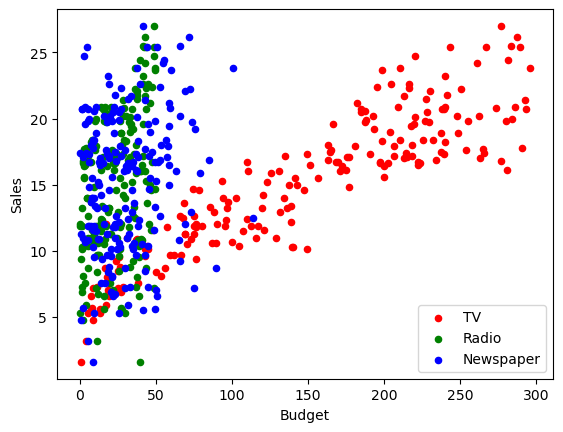

In [11]:
ax1 = df.plot(kind='scatter', x='TV', y='Sales', color='r',  label="TV")    
ax2 = df.plot(kind='scatter', x='Radio', y='Sales', color='g', ax=ax1, label="Radio")    
ax3 = df.plot(kind='scatter', x='Newspaper', y='Sales', color='b', ax=ax1, label ="Newspaper")

ax1.set_xlabel("Budget")
ax1.set_ylabel("Sales")

## "Row-by-Row" comparison

Let's calculate the predictions and print them out with the reals sales values together


In [12]:
### Based on two features prediction
# First check which coefficient for which feature
print(m.coef_)
print(list(zip(m.coef_, features)))

[0.05461317 0.10204696]
[(0.05461316825103991, 'TV'), (0.10204695772378576, 'Radio')]


In [13]:
# Then calculate the predictions
w0 = m.intercept_
w1 = m.coef_[0]
w2 = m.coef_[1]

est1 = w0 + w1*df['TV'] + w2*df['Radio']
df['estimation1'] = est1


In [14]:
### Based on three features prediction
# Also check which coefficient for which feature
print(m2.coef_)
print(list(zip(m2.coef_, features2)))

[0.05461383 0.09975946 0.00430495]
[(0.054613834239870124, 'TV'), (0.09975946349361563, 'Radio'), (0.004304951015039124, 'Newspaper')]


In [15]:
w0_2 = m2.intercept_
w1_2 = m2.coef_[0]
w2_2 = m2.coef_[1]
w3_2 = m2.coef_[2]

est2 = w0_2 + w1_2*df['TV'] + w2_2*df['Radio'] + w3_2*df['Newspaper']
df['estimation2'] = est2

# Let's see:
df

,TV,Radio,Newspaper,Sales,estimation1,estimation2
0,230.1,37.8,69.2,22.1,21.243179,21.377296
1,44.5,39.3,45.1,10.4,11.260046,11.286858
2,17.2,45.9,69.3,12.0,10.442616,10.558493
3,151.5,41.3,58.5,16.5,17.307749,17.387744
4,180.8,10.8,58.4,17.9,15.795482,15.944835
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,7.283111,7.256609
196,94.2,4.9,8.1,14.0,10.463905,10.410157
197,177.0,9.3,6.4,14.8,15.434882,15.363806
198,283.6,42.0,66.2,25.5,24.593581,24.705211
